# Treble-Boost

Deseamos amplificar las señales con frecuencias $\omega > \omega_C$, con $\omega_C = \frac{\pi}{2}$, usando un filtro FIR de largo $M=9$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import ifft, ifftshift, fftshift
from numpy import pi, abs, exp
from scipy.signal import freqz
%matplotlib inline

Primero creamos el vector $\omega_k = \frac{2\pi k}{M}$, $k = 0, 1, \ldots, M-1$ 

In [2]:
#M = 9
M = 35
omega_c = pi / 2
k = np.arange(M)
omega_k = 2 * pi * k / M

y el vector $\omega_{k\_equiv}$ con frecuencias equivalentes a $\omega_k$ en el rango $[-\pi, \pi]$:

In [3]:
omega_k_equiv = ((omega_k + pi) % (2*pi) ) - pi

Luego creamos $H_d(\omega_{k\_equiv})$, sin olvidar multiplicar por $e^{-j\omega_{k\_equiv}\frac{M-1}{2}}$ para que $H_d(\omega)$ tenga fase lineal

In [4]:
Hd = (1 + (abs(omega_k_equiv) >= omega_c)) * exp(-1j * omega_k_equiv * (M-1) / 2)
Hd = (1 + 20*(abs(omega_k_equiv) >= omega_c)) * exp(-1j * omega_k_equiv * (M-1) / 2)

Finalmente, encontramos $h(n)$ calculando la IDFT de $Hd(\omega_k)$:

In [5]:
h = np.real(ifft(Hd))

Finalmente graficamos la respuesta en frequencia del filtro obtenido para verificar nuestro diseño:

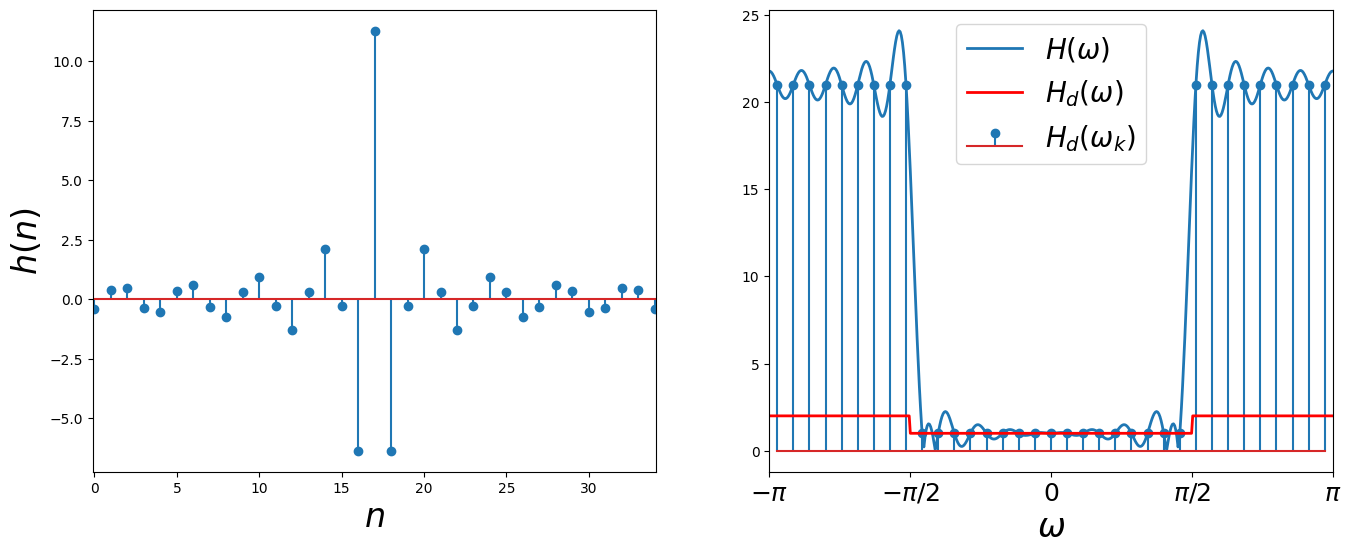

In [6]:
w = np.linspace(-pi, pi, 500)
_, H = freqz(h, 1, w)
_, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].stem(k, h)
axs[0].set_xlim(-0.1, M-0.9)
axs[0].set_xlabel('$n$', fontsize=24)
axs[0].set_ylabel('$h(n)$', fontsize=24)

axs[1].plot(w, abs(H), lw=2)
axs[1].stem(omega_k_equiv, abs(Hd))
axs[1].plot(w, 1 + (abs(w) >= omega_c), lw=2, c='r')
axs[1].set_xlim(-pi, pi)
axs[1].set_xlabel(r'$\omega$', fontsize=24)
axs[1].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
axs[1].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[1].legend((r'$H(\omega)$', r'$H_d(\omega)$',r'$H_d(\omega_k)$'), loc='upper center', fontsize=20)

## Usando el filtro con una señal de audio

In [13]:
from audio_nb import Audio
from scipy.signal import lfilter
Fs = 3960 #44100
T = 2 # length of the audio
t = np.linspace(0, T, Fs*T)
f1 = 440
f2 = 3 * f1
x = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)
Audio(x,rate=Fs)
x.dtype

dtype('float64')

In [8]:
y = lfilter(h, 1, x)

In [9]:
Audio(y, rate=Fs)

In [10]:
Fs/4


990.0

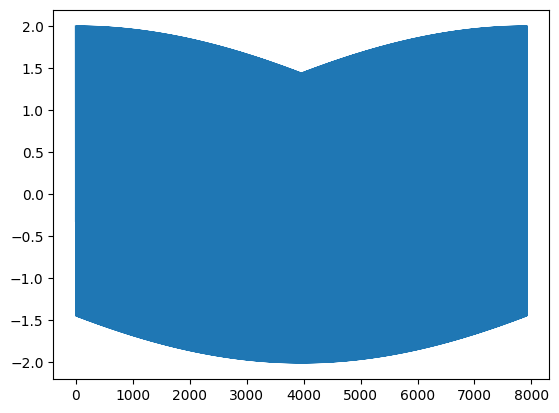

In [11]:
plt.plot(x)